In [177]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import seaborn as sns
from bs4 import BeautifulSoup

In [178]:

cust = pd.read_csv("/content/customer_details.csv")

In [179]:
cust.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
1,2,19,Male,Sweater,Clothing,64,Maine,L,Maroon,Winter,3.1,Yes,Express,Yes,Yes,2,Cash,Fortnightly
2,3,50,Male,Jeans,Clothing,73,Massachusetts,S,Maroon,Spring,3.1,Yes,Free Shipping,Yes,Yes,23,Credit Card,Weekly
3,4,21,Male,Sandals,Footwear,90,Rhode Island,M,Maroon,Spring,3.5,Yes,Next Day Air,Yes,Yes,49,PayPal,Weekly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually


In [180]:
cust.isnull().sum()

Customer ID               0
Age                       0
Gender                    0
Item Purchased            0
Category                  0
Purchase Amount (USD)     0
Location                  0
Size                      0
Color                     0
Season                    0
Review Rating             0
Subscription Status       0
Shipping Type             0
Discount Applied          0
Promo Code Used           0
Previous Purchases        0
Payment Method            0
Frequency of Purchases    0
dtype: int64

In [181]:
cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             3900 non-null   int64  
 1   Age                     3900 non-null   int64  
 2   Gender                  3900 non-null   object 
 3   Item Purchased          3900 non-null   object 
 4   Category                3900 non-null   object 
 5   Purchase Amount (USD)   3900 non-null   int64  
 6   Location                3900 non-null   object 
 7   Size                    3900 non-null   object 
 8   Color                   3900 non-null   object 
 9   Season                  3900 non-null   object 
 10  Review Rating           3900 non-null   float64
 11  Subscription Status     3900 non-null   object 
 12  Shipping Type           3900 non-null   object 
 13  Discount Applied        3900 non-null   object 
 14  Promo Code Used         3900 non-null   

In [182]:
cust.describe()

,Customer ID,Age,Purchase Amount (USD),Review Rating,Previous Purchases
count,3900.000000,3900.000000,3900.000000,3900.000000,3900.000000
mean,1950.500000,44.068462,59.764359,3.749949,25.351538
std,1125.977353,15.207589,23.685392,0.716223,14.447125
min,1.000000,18.000000,20.000000,2.500000,1.000000
25%,975.750000,31.000000,39.000000,3.100000,13.000000
50%,1950.500000,44.000000,60.000000,3.700000,25.000000
75%,2925.250000,57.000000,81.000000,4.400000,38.000000
max,3900.000000,70.000000,100.000000,5.000000,50.000000


### EDA

# age of customer

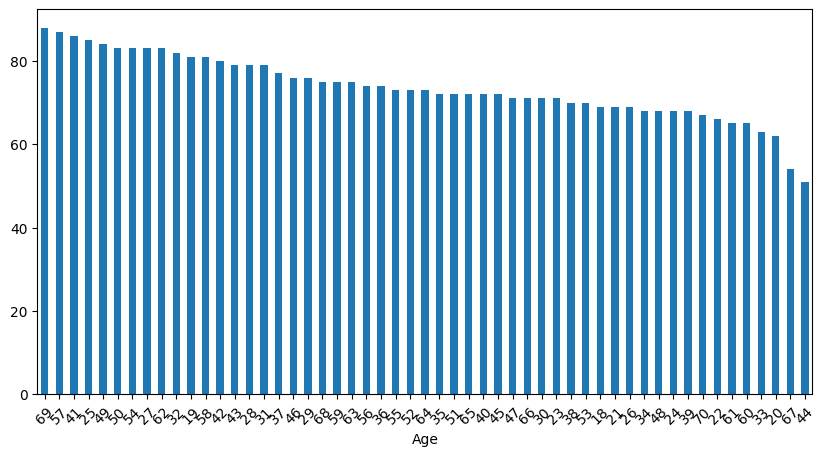

In [183]:
plt.figure(figsize=(10 , 5))
cust['Age'].value_counts().plot(kind='bar')
plt.xticks(rotation=45)
plt.show()

# which gender has most of the  costomer

<Axes: xlabel='Gender'>

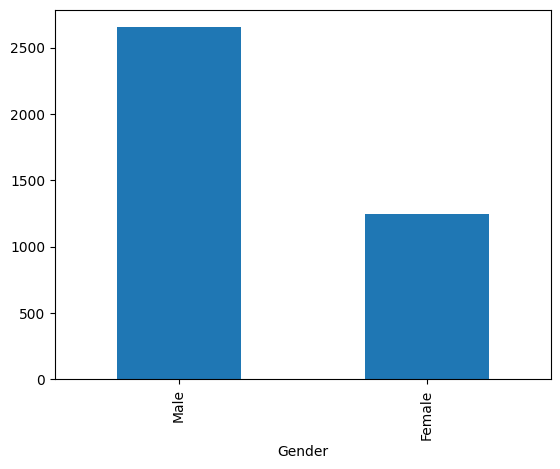

In [184]:
cust['Gender'].value_counts().plot(kind='bar')

# which gender buys things in which season and what ther are busying in what age

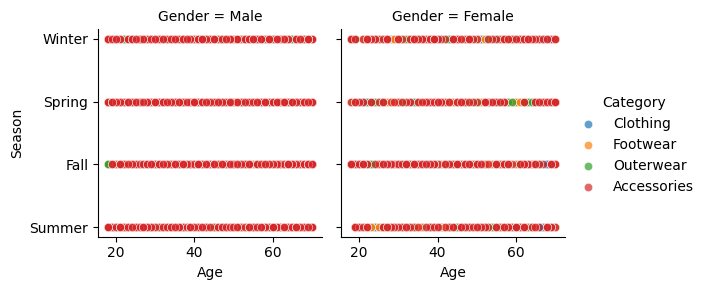

In [124]:
g = sns.FacetGrid(cust, col="Gender", hue="Category")
g.map(sns.scatterplot, "Age", "Season", alpha=.7)
g.add_legend()

# which gender has most of the buyers

<Figure size 1000x500 with 0 Axes>

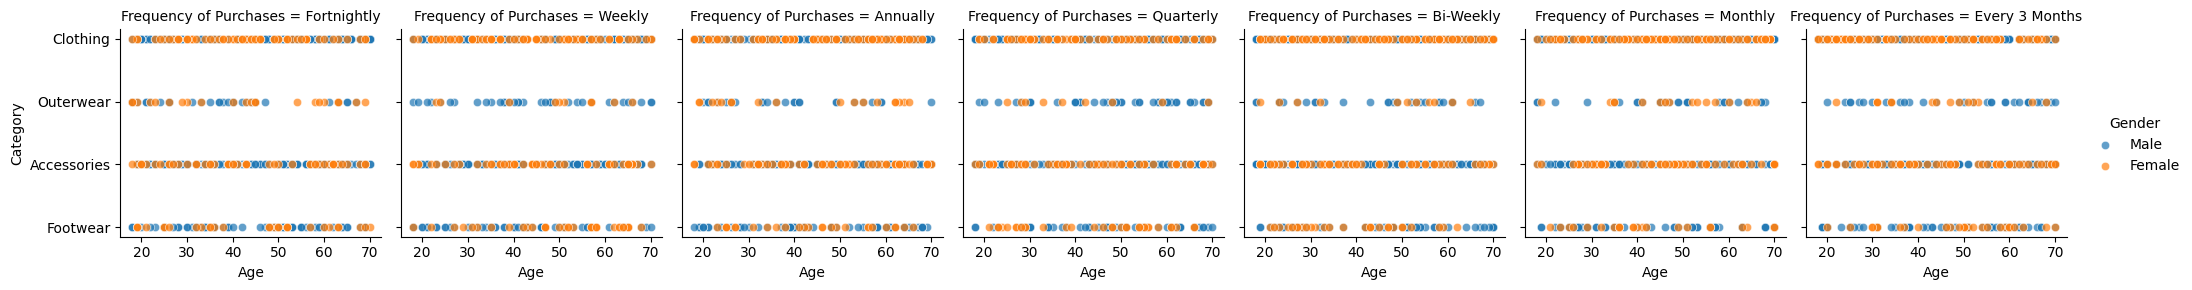

In [131]:
g = sns.FacetGrid(cust, col="Frequency of Purchases", hue="Gender")
g.map(sns.scatterplot, "Age", "Category", alpha=.7)
g.add_legend()

# which payment method costomer use most ?

<Axes: xlabel='Payment Method'>

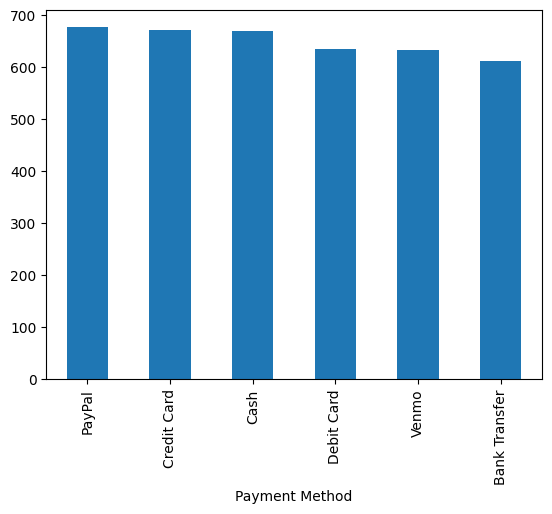

In [134]:
cust['Payment Method'].value_counts().plot(kind='bar')

# which category has most of the rating?

<Axes: xlabel='Gender', ylabel='Category'>

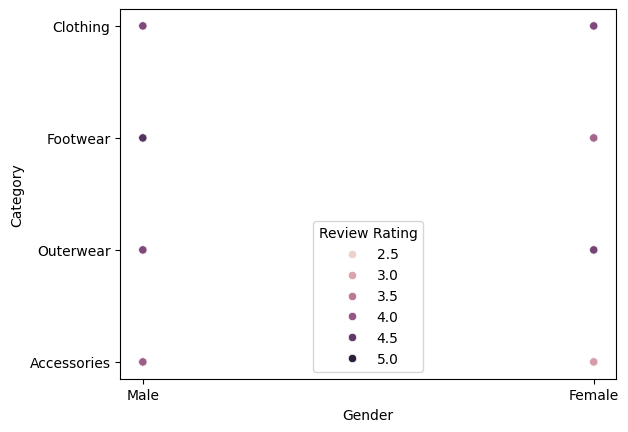

In [147]:
sns.scatterplot(data=cust , y='Category' ,x='Gender' ,  hue='Review Rating')

# which gender take most of the subscription?

<Axes: xlabel='Subscription Status', ylabel='Category'>

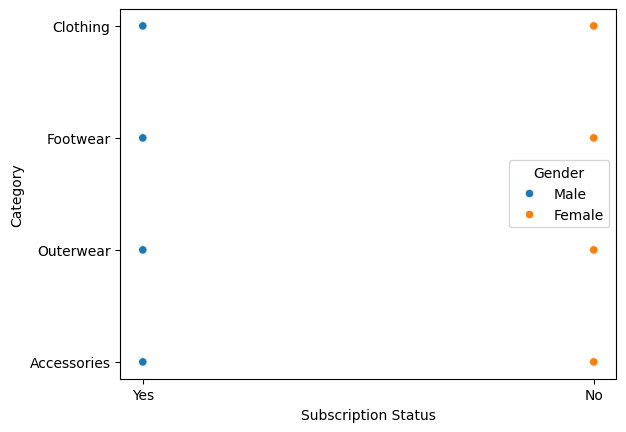

In [150]:
sns.scatterplot(data=cust , x='Subscription Status' , y='Category' ,hue='Gender')

#shipping type loved by costomer?

<Axes: xlabel='Shipping Type'>

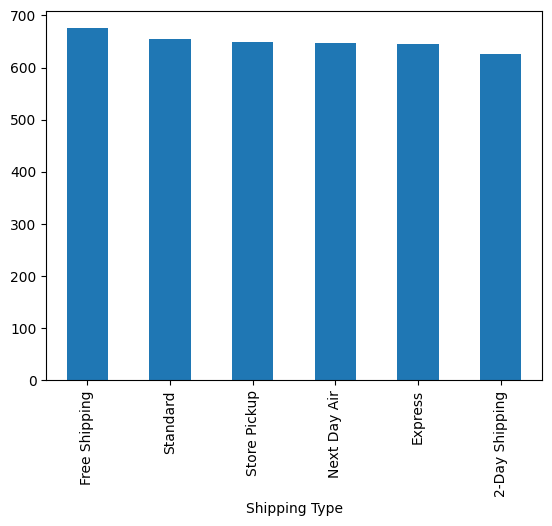

In [161]:
cust['Shipping Type'].value_counts().plot(kind='bar')

# size person available their

<Axes: xlabel='Size'>

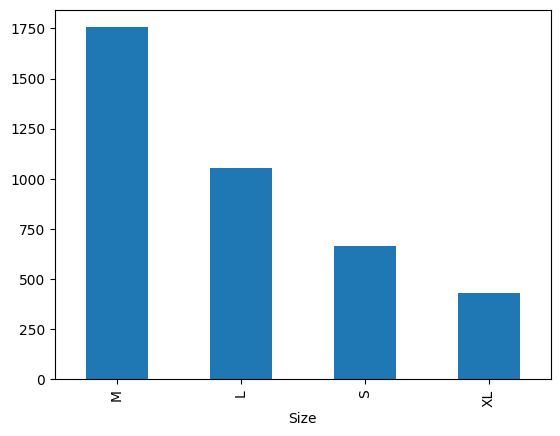

In [165]:
cust['Size'].value_counts().plot(kind='bar')

<Axes: xlabel='Age', ylabel='Size'>

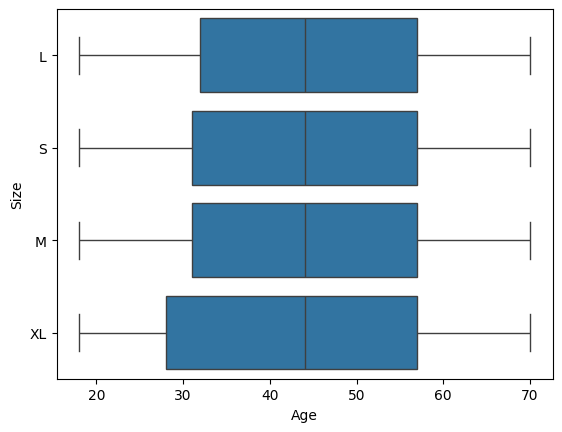

In [175]:
sns.boxplot(data=cust , x='Age' , y='Size' )

# top most purches in location

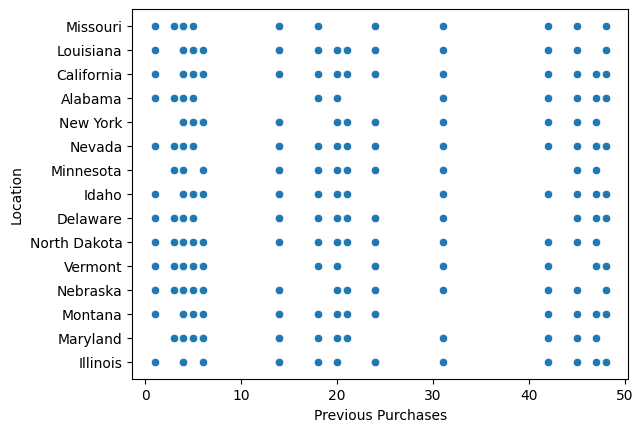

In [205]:
top_cust = cust['Location'].value_counts().head(15).index.tolist()
top_most_purchase = cust['Previous Purchases'].value_counts().head(15).index.tolist()

filtered = cust[cust['Location'].isin(top_cust) & cust['Previous Purchases'].isin(top_most_purchase)]

sns.scatterplot(data=filtered, y='Location', x='Previous Purchases')
plt.show()

# top most city buyers

<Axes: xlabel='Location'>

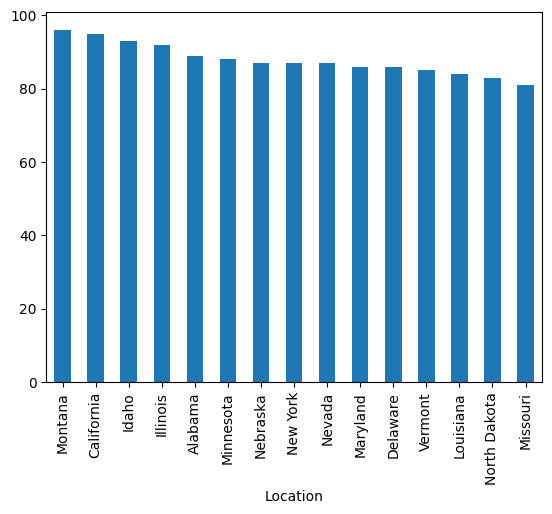

In [200]:
cust['Location'].value_counts().head(15).plot(kind='bar')

# which location has most of the buyers and their age ?


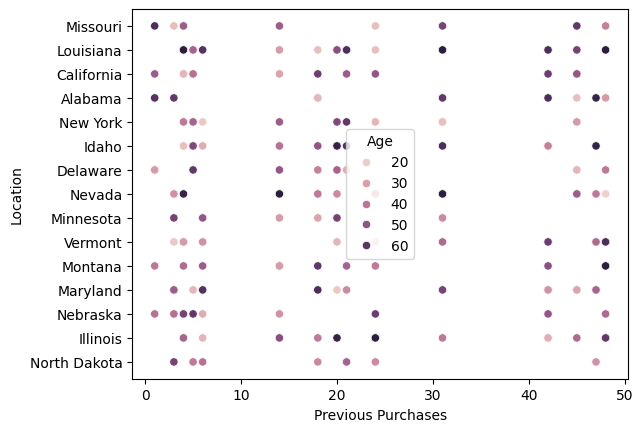

In [206]:
top_cust = cust['Location'].value_counts().head(15).index.tolist()
top_most_purchase = cust['Previous Purchases'].value_counts().head(15).index.tolist()
# top_Age = cust['Location'].value_counts().head(15).index.tolist()

filtered = cust[cust['Location'].isin(top_cust) & cust['Previous Purchases'].isin(top_most_purchase) & cust['Age']]

sns.scatterplot(data=filtered, y='Location', x='Previous Purchases' , hue='Age')
plt.show()

# which item bougth most of the time ?

<Axes: xlabel='Item Purchased'>

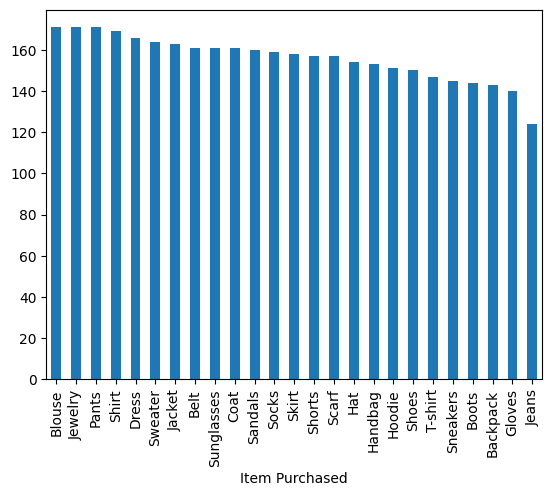

In [210]:
cust['Item Purchased'].value_counts().plot(kind='bar')

# Items bougth by Gender

<Axes: xlabel='Gender', ylabel='Item Purchased'>

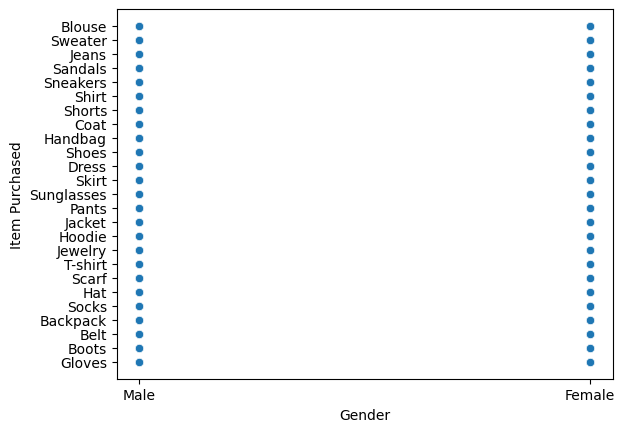

In [213]:
sns.scatterplot(data=cust , y='Item Purchased' , x='Gender')

In [222]:
female_blouse_buyers = cust[(cust['Gender'] == 'Male') & (cust['Item Purchased'] == 'Blouse')]

In [224]:
female_blouse_buyers.head()

,Customer ID,Age,Gender,Item Purchased,Category,Purchase Amount (USD),Location,Size,Color,Season,Review Rating,Subscription Status,Shipping Type,Discount Applied,Promo Code Used,Previous Purchases,Payment Method,Frequency of Purchases
0,1,55,Male,Blouse,Clothing,53,Kentucky,L,Gray,Winter,3.1,Yes,Express,Yes,Yes,14,Venmo,Fortnightly
4,5,45,Male,Blouse,Clothing,49,Oregon,M,Turquoise,Spring,2.7,Yes,Free Shipping,Yes,Yes,31,PayPal,Annually
35,36,54,Male,Blouse,Clothing,33,Massachusetts,M,Cyan,Summer,4.0,Yes,2-Day Shipping,Yes,Yes,48,Credit Card,Bi-Weekly
50,51,49,Male,Blouse,Clothing,28,Maryland,M,Red,Spring,3.7,Yes,Store Pickup,Yes,Yes,39,Debit Card,Bi-Weekly
66,67,31,Male,Blouse,Clothing,94,Pennsylvania,S,Magenta,Winter,4.7,Yes,2-Day Shipping,Yes,Yes,3,Venmo,Every 3 Months


Index(['Uniqe Id', 'Product Name', 'Brand Name', 'Asin', 'Category',
       'Upc Ean Code', 'List Price', 'Selling Price', 'Quantity',
       'Model Number', 'About Product', 'Product Specification',
       'Technical Details', 'Shipping Weight', 'Product Dimensions', 'Image',
       'Variants', 'Sku', 'Product Url', 'Stock', 'Product Details',
       'Dimensions', 'Color', 'Ingredients', 'Direction To Use',
       'Is Amazon Seller', 'Size Quantity Variant', 'Product Description'],
      dtype='object')

Index(['user id', 'product id', 'Interaction type', 'Time stamp',
       'Unnamed: 4'],
      dtype='object')